# Trap Shape Vs. Aperture for Gaussian Input

In [11]:
from scipy.integrate import quad, dblquad
import scipy.special as sp
from matplotlib.pyplot import *
from matplotlib import style
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
#style.use(['dark_background'])
#style.use(['seaborn-dark-palette'])
style.use(['dark_background'])

### sq conv test

In [212]:
def square(x):
    if abs(x)<0.5:
        return 1.0
    return 0.0

### actual integration

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


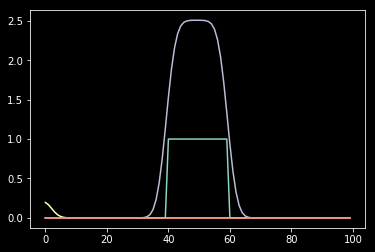

In [257]:
xpts = np.linspace(1,2e2,1e2)
Z = [square((x-100)/40) for x in xpts]
plot(Z);
w = 5
gpt = [1/w*np.exp(-x**2/(2*w**2)) for x in xpts]
ypts = [quad(lambda x: 1/w*np.exp(-(x_-x)**2/(2*w**2))*square((x-100)/40),0.0,1.0e3) for x_ in xpts]
plot(gpt)
plot(ypts)

#ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]
#plot(xpts,[square((x-6)/3,0) for x in xpts])

### numerical convolution

In [259]:
from scipy.signal import convolve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


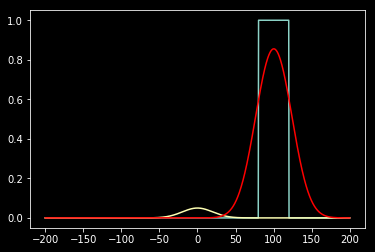

In [289]:
xpts = np.linspace(-2e2,2e2,1e3)
Z = [square((x-100)/40) for x in xpts]
plot(xpts,Z);
w = 20
gpt = [1/w*np.exp(-x**2/(2*w**2)) for x in xpts]
ypts = convolve(gpt, Z,'same') / 5
plot(xpts,gpt)
plot(xpts,ypts,color='r')

#ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]
#plot(xpts,[square((x-6)/3,0) for x in xpts])

sq conv test

In [198]:
def square2D(x,y):
    if abs(x)<0.5:
        if abs(y)<0.5:
            return 1.0
    return 0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


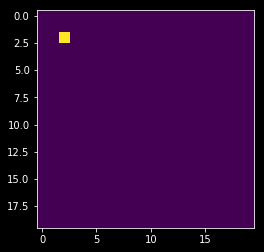

In [196]:
xpts = np.linspace(1,1e3,2e1)
ypts = xpts[:]
X, Y = np.meshgrid(xpts,ypts)
Z = np.zeros(X.shape)
Zp = Z[:]
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i,j] = square((X[i,j]-100)/40,(Y[i,j]-100)/40)
imshow(Z)
#ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]
#plot(xpts,[square((x-6)/3,0) for x in xpts])

................................................................................................................................................................................................................................................................................................................................................................................................................

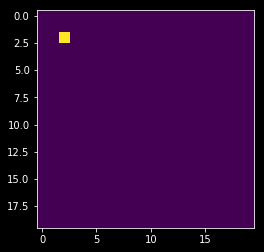

In [197]:
for i in range(len(X)):
    for j in range(len(X[0])):
        print('.',end='')
        Zp[i,j] = dblquad(lambda x, y: np.exp(-(x**2+y**2)/0.1)*square((X[i,j]-x-100)/40,(Y[i,j]-y-100)/40),0,1e3,lambda x: 0, lambda x: 1e3)[0]
imshow(Zp)

### 2d convolve numeric

In [290]:
from scipy.signal import convolve2d

In [291]:
def square2D(x,y):
    if abs(x)<0.5:
        if abs(y)<0.5:
            return 1.0
    return 0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


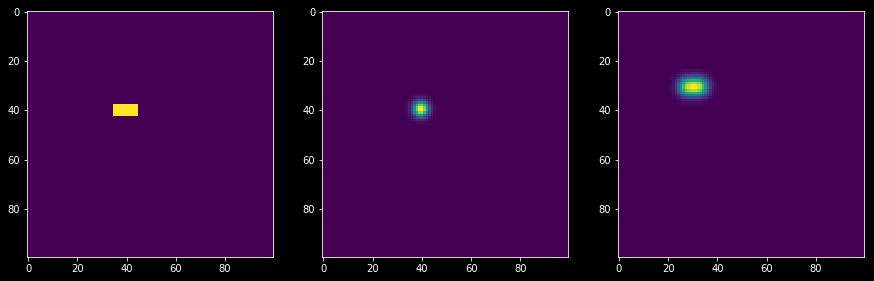

In [362]:
xpts = np.linspace(1,1e3,1e2)
ypts = xpts[:]
X, Y = np.meshgrid(xpts,ypts)
Z = np.zeros(X.shape)
Zp = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i,j] = square2D((X[i,j]-400)/100,(Y[i,j]-400)/50)
f, ax = subplots(1,3,figsize=(15,5))
w = 30
for i in range(len(X)):
    for j in range(len(X[0])):
        Zp[i,j] = np.exp(-((X[i,j]-4e2)**2+(Y[i,j]-4e2)**2)/w**2)

Zc = convolve2d(Zp,Z,'same')
ax[0].imshow(Z)
ax[1].imshow(Zp)
ax[2].imshow(Zc)
#ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]
#plot(xpts,[square((x-6)/3,0) for x in xpts])

# Real problem

In [446]:
from fitters.Gaussian import gaussian_2d

In [609]:
npts = 100
l = 2e-1
xpts = np.linspace(-l,l,npts)
ypts = np.linspace(-l,l,npts)
X, Y = np.meshgrid(xpts,ypts)
maxes = []
nplts = 10
diameters = np.linspace(1e-3,100,nplts);
waists = np.linspace(4,40,nplts)
convIms = []
D = 30
#w = 15
#for D in diameters:
for w in waists:
    #print('.',end='')
    jincIm = np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(len(X[0])):
            x = X[i,j]
            y = Y[i,j]
            jincIm[i,j] = D*sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)
    gaussIm = np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(len(X[0])):
            x = X[i,j]
            y = Y[i,j]
            gaussIm[i,j] = w*np.exp(-np.pi**2*w**2*(x**2+y**2))
    print(sum(gaussIm.flatten()**2))
    convIm = convolve2d(jincIm,gaussIm,'same')
    convIms.append(convIm)
    maxes.append(max(convIm.flatten())**2)

9749.22760398087
9749.234982772941
9749.234982772927
9749.234982772912
9749.234982772923
9749.234982772921
9749.234982772914
9749.234982768932
9749.234980647565
9749.234793314246


In [670]:
import Miscellaneous as misc

In [675]:
npts = 401
l = 1e-1
xpts = np.linspace(-l,l,npts)
ypts = np.linspace(-l,l,npts)
X, Y = np.meshgrid(xpts,ypts)
maxes_d = []
nplts = 40
diameters = np.linspace(1,40,nplts);
waists = np.linspace(4,40,nplts)
convIms_d = []
#D = 30
w = 15
for D in diameters:
#for w in waists:
    #print('.',end='')
    jincIm = np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(len(X[0])):
            x = X[i,j]
            y = Y[i,j]
            if abs(x) < 1e-5 and abs(y) < 1e-5:
                jincIm[i,j] = 1/2
            else:
                jincIm[i,j] = D*sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/(2*np.pi*np.sqrt(x**2+y**2))
    gaussIm = np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(len(X[0])):
            x = X[i,j]
            y = Y[i,j]
            gaussIm[i,j] = w**2*np.exp(-np.pi**2*w**2*(x**2+y**2))
    #figure()
    #imshow(jincIm)
    #colorbar()
    convIm = convolve2d(jincIm,gaussIm,'same')
    print(misc.round_sig(sum(jincIm.flatten()**2)),misc.round_sig(sum(gaussIm.flatten()**2)), misc.round_sig(sum(convIm.flatten()**2)))
    #f, ax = subplots(1,3)
    #ax[0].imshow(jincIm)
    #ax[0].set_title('jinc')
    #ax[1].imshow(gaussIm)
    #ax[2].imshow(convIm)
    
    convIms_d.append(convIm)
    maxes_d.append(max(convIm.flatten())**2)

37600.0 143000000.0 4.97e+16
497000.0 143000000.0 6.74e+17
1860000.0 143000000.0 2.62e+18
4030000.0 143000000.0 5.88e+18
6640000.0 143000000.0 9.77e+18
9670000.0 143000000.0 1.38e+19
13400000.0 143000000.0 1.8e+19
18000000.0 143000000.0 2.27e+19
23300000.0 143000000.0 2.76e+19
29000000.0 143000000.0 3.23e+19
35300000.0 143000000.0 3.66e+19
42300000.0 143000000.0 4.03e+19
50000000.0 143000000.0 4.37e+19
58400000.0 143000000.0 4.67e+19
67300000.0 143000000.0 4.93e+19
76800000.0 143000000.0 5.15e+19
87000000.0 143000000.0 5.31e+19
97900000.0 143000000.0 5.44e+19
109000000.0 143000000.0 5.54e+19
122000000.0 143000000.0 5.62e+19
134000000.0 143000000.0 5.68e+19
148000000.0 143000000.0 5.72e+19
162000000.0 143000000.0 5.74e+19
176000000.0 143000000.0 5.76e+19
192000000.0 143000000.0 5.78e+19
207000000.0 143000000.0 5.79e+19
224000000.0 143000000.0 5.79e+19
241000000.0 143000000.0 5.79e+19
259000000.0 143000000.0 5.8e+19
278000000.0 143000000.0 5.8e+19
297000000.0 143000000.0 5.8e+19
31600000

### fitting...

In [517]:
import scipy.optimize as opt

In [ ]:
guess = [1e6,0,0,3e-2,3e-2,0,0]
im = convIms[0]
Z_guess = np.reshape(gaussian_2d.f((X,Y),*guess),X.shape)
try:
    vals, cov = opt.curve_fit(gaussian_2d.f,(X,Y),im.flatten(), p0=guess);
except RuntimeError:
    print('fail')
    vals = guess
    pass
Z = np.reshape(gaussian_2d.f((X,Y),*vals),X.shape)
imshow(Z_guess)
colorbar()
figure()
imshow(Z)
title('fit')
colorbar()
figure()
imshow(im)
colorbar()
print(vals)
figure()
imshow(im-Z)
colorbar()

In [565]:
centered_gaussian = lambda C, A, sx, sy, o, t: gaussian_2d.f(C,A,1,1,sx,sy,o,t)

0,1,2,3,4,5,6,7,

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


8,9,10,11,12,13,14,15,16,17,18,19,

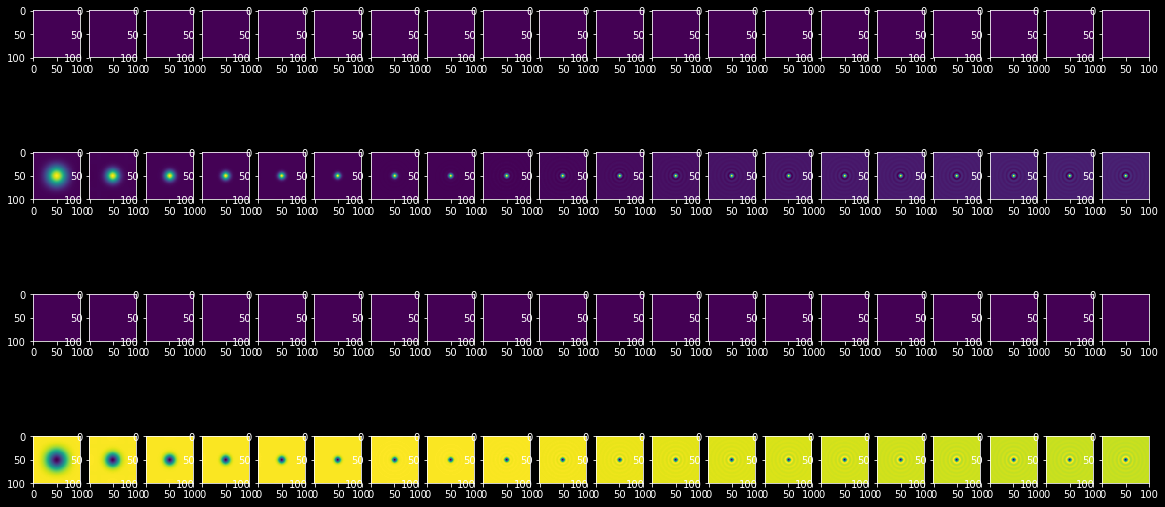

In [566]:
f, ax = subplots(4,len(convIms), figsize=(20,10))
fitList = []
for i, im in enumerate(convIms):
    print(i,end=',')
    guess = [1e6,3e-2/np.sqrt(i+1),3e-2/np.sqrt(i+1),0,0]
    Z_guess = np.reshape(centered_gaussian((X,Y),*guess),X.shape)
    try:
        vals, cov = opt.curve_fit(centered_gaussian,(X,Y),im.flatten(), p0=guess);
    except RuntimeError:
        print('fail!')
        vals = guess
    fitList.append(vals)
    Z = np.reshape(centered_gaussian((X,Y),*vals),X.shape)
    ax[0,i].imshow(Z)
    ax[1,i].imshow(im)
    ax[2,i].imshow(Z_guess)
    ax[3,i].imshow(Z-im)

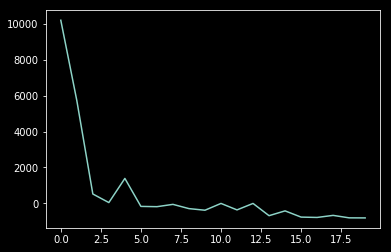

In [564]:
plot([fit[4] for fit in fitList])

### Increasing Waist

ValueError: x and y must have same first dimension, but have shapes (25,) and (10,)

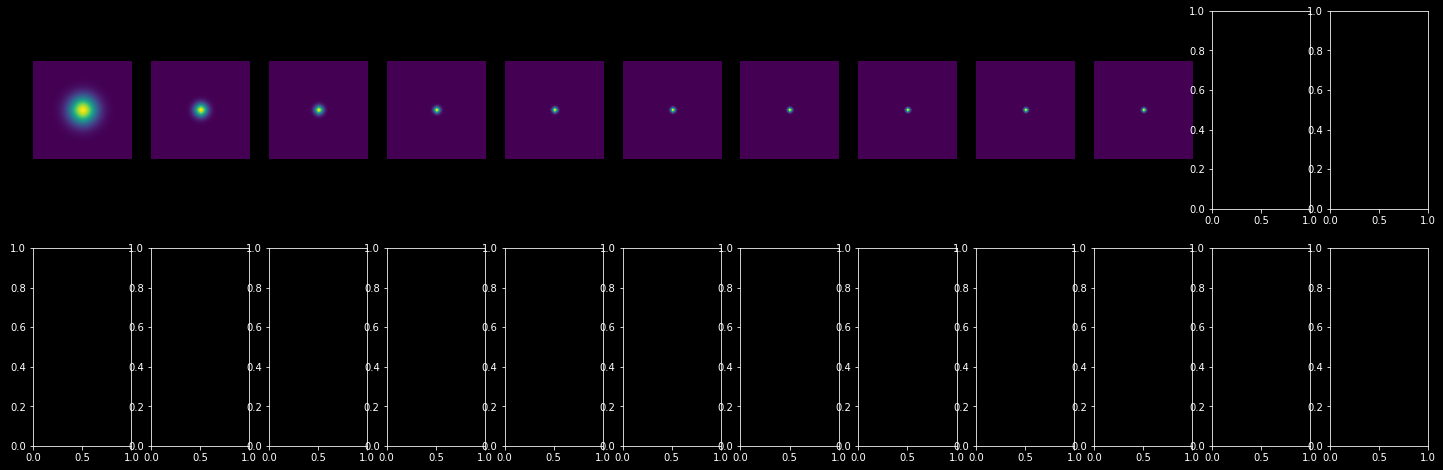

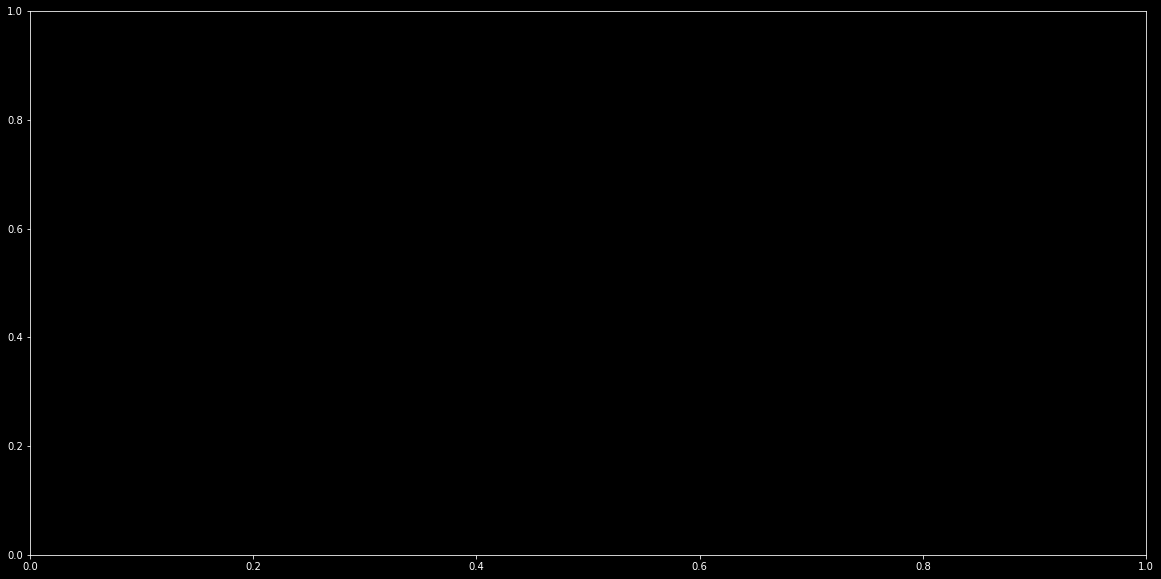

In [664]:
f, ax = subplots(2,int(nplts/2), figsize=(25, 8))
minv = min(arr(convIms).flatten())**2
maxv = max(arr(convIms).flatten())**2
maxes = []
totals = []
for im, a in zip(convIms, ax.flatten()):
    a.imshow( im**2 )
    a.axis( 'off')
    maxes.append(max(im.flatten())**2)
    totals.append(sum(im.flatten())**2)
figure(figsize=(20,10))
plot(waists/D,maxes/max(maxes), label='Maximum Light')
plot(waists/D,totals/max(totals), label='Total Light')
legend()
xlabel('w/D')
grid(alpha=0.1)

### increasing Aperture

In [667]:
len(diameters)

25

In [681]:
for d, m in zip(diameters, maxes):
    print(misc.round_sig(d/w),':',misc.round_sig(m))

0.0667 : 403000000000.0
0.133 : 6370000000000.0
0.2 : 31500000000000.0
0.267 : 96600000000000.0
0.333 : 227000000000000.0
0.4 : 448000000000000.0
0.467 : 785000000000000.0
0.533 : 1260000000000000.0
0.6 : 1870000000000000.0
0.667 : 2640000000000000.0
0.733 : 3550000000000000.0
0.8 : 4580000000000000.0
0.867 : 5720000000000000.0
0.933 : 6930000000000000.0
1.0 : 8190000000000000.0
1.07 : 9470000000000000.0
1.13 : 1.07e+16
1.2 : 1.19e+16
1.27 : 1.31e+16
1.33 : 1.42e+16
1.4 : 1.51e+16
1.47 : 1.6e+16
1.53 : 1.68e+16
1.6 : 1.75e+16
1.67 : 1.8e+16
1.73 : 1.85e+16
1.8 : 1.89e+16
1.87 : 1.93e+16
1.93 : 1.95e+16
2.0 : 1.97e+16
2.07 : 1.99e+16
2.13 : 2.01e+16
2.2 : 2.02e+16
2.27 : 2.02e+16
2.33 : 2.03e+16
2.4 : 2.03e+16
2.47 : 2.04e+16
2.53 : 2.04e+16
2.6 : 2.04e+16
2.67 : 2.04e+16


In [683]:
1.97/2.04

0.9656862745098039

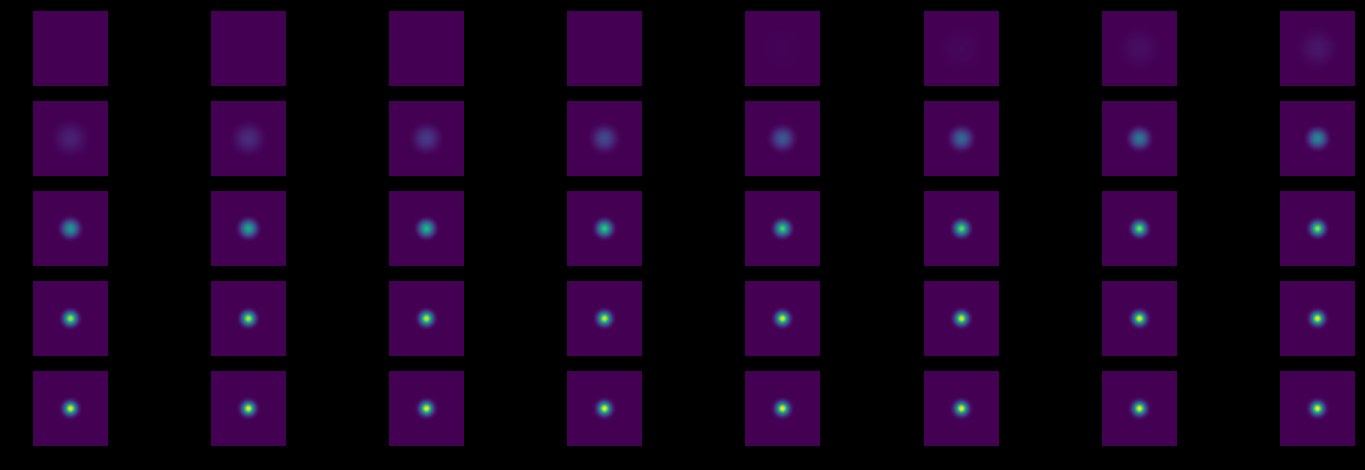

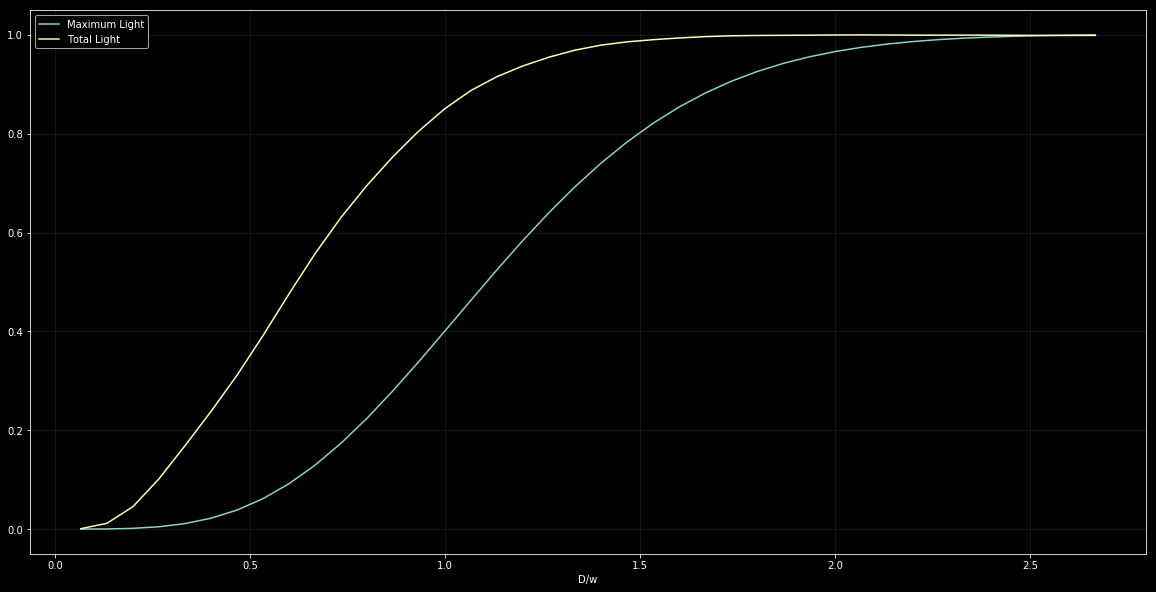

In [676]:
f, ax = subplots(5,int(nplts/5), figsize=(25, 8))
minv = min(arr(convIms_d).flatten())**2
maxv = max(arr(convIms_d).flatten())**2
maxes = []
totals = []
for im, a in zip(convIms_d, ax.flatten()):
    a.imshow( im**2, vmin=minv, vmax=maxv )
    a.axis( 'off' )
    maxes.append(max(im.flatten()**2))
    totals.append(sum(im.flatten()**2))
figure(figsize=(20,10))
plot(diameters/w,maxes/max(maxes), label='Maximum Light')
plot(diameters/w,totals/max(totals), label='Total Light')
legend()
xlabel('D/w')
grid(alpha=0.1)

In [341]:
from numpy import array as arr

In [119]:
xpts = np.linspace(1e-5,1.5e1,40)

In [114]:
ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


 real thing

In [2]:
val = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)

In [112]:
w_0 = 0.5
D = 10

In [113]:
xpts = np.linspace(1e-5,1.5e1,40)

In [114]:
ypts = [w_0**2*dblquad(lambda x, y: sp.jv(1,2*np.pi*D*np.sqrt(x**2+y**2))/np.sqrt(x**2+y**2)*np.exp(-np.pi**2*w_0**2*((x_-x)**2 + y**2)), -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)[0] for x_ in xpts]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


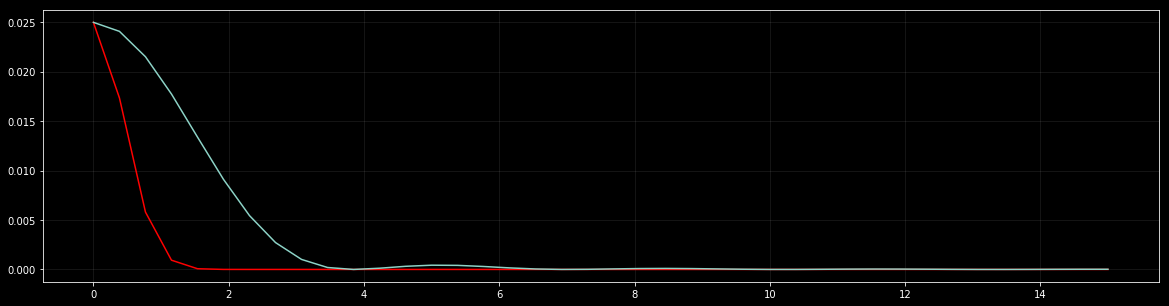

In [118]:
figure(figsize=(20,5))
#xpts = np.linspace(1e-5,2e1,1e6)
grid(alpha=0.1)
plot(xpts,ypts,'r')
plot(xpts,0.1*(sp.jv(1,xpts)/xpts)**2)

# Calculating expected strehl ratio

Assuming that we are clipping at the 1/e^2 gaussian waist, the relevant ratio is D/w=2 in the above charts. Therefore, the expected depth is $0.965\times$ the depth we'd get for an unclipped gaussian with the focal length we observe. What is expected from the perfect gaussian can be calculated by using the measured waist, figuring out how much loss we expect from the sill and other optics, and properly normalizing the shrunk gaussian. 

In [686]:
power = 3e-3*0.9

$$
I=I_0 \exp\{-2r^2/w^2\}=P\big( \frac{1}{w}\sqrt{\frac{2}{\pi}}\big)^2\exp\{-2r^2/w^2\}=\frac{2P}{w^2\pi}\exp\{-2r^2/w^2\}\\
I_0 = \frac{2P}{\pi w^2} 
$$

In [694]:
def trapDepthFromIntensity_Feb_1st_2019(intensity):
    # assumes 852nm
    # 1e3 * ManifoldShift(2, 2, intensity, '5S12', wavelength)/mc.k_B = -4.652899246307172e-10
    return intensity*(-4.652899246307172e-10)

In [693]:
waist=650e-9
power = 3e-3*0.85
expectedIntensity = 2*power/(np.pi*waist**2)

this is the expected depth for 3mW input: -1.79mK

In [695]:
trapDepthFromIntensity_Feb_1st_2019(expectedIntensity)

-1.787793024978716

$$
2/w^2=m\omega/2\hbar\\
w=\sqrt{\frac{4\hbar}{m\omega}}
$$

In [698]:
import MarksConstants as mc